# Práctica 1 - Self-Organising Maps
## Preparación de entorno
#### Importar librerías de código

In [248]:
%reset
# from __future__ import division
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [249]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
datos = np.random.randint(0, 256, (3, 100))

## SOM Setup
#### Variables definidas por el alumno

In [250]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 50
periodo = 1000
learning_rate = 0.15
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [251]:
num_datos = 100
num_entradas = 3
# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
if normalizar_datos:
    datos = datos/255

# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
 



# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa // 2



    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
#matriz_pesos = np.random.random((dimensiones de la matriz de pesos))
matriz_pesos = np.random.random((lado_mapa, lado_mapa, num_entradas))


#### Funciones para entrenar/clasificar

In [252]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, m):
    distancia_min = float('inf')
    bmu_index = np.zeros(2)
    bmu = np.zeros(num_entradas)
    for i in range(matriz_pesos.shape[0]):
        for j in range(matriz_pesos.shape[1]):
            distancia_euclidea = np.sqrt((patron_entrada[0] - m_pesos[i,j][0])**2 + (patron_entrada[1] - m_pesos[i,j][1])**2 + (patron_entrada[2] - m_pesos[i,j][2])**2)
            if distancia_euclidea < distancia_min :
                distancia_min = distancia_euclidea
                bmu_index = [i, j]
                bmu = m_pesos[i,j]
    return bmu, bmu_index



In [253]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    learning_rate_i = lr_inicial * (1 - (i/n_iteraciones))
    return learning_rate_i


In [254]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    vecindario_i = 1 + (vecindario_inicial * (1 - i/n_iteraciones))
    return vecindario_i

In [255]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-(distancia_BMU **2)/ (2* (vecindario_actual**2)))


#### Funciones para dibujar la salida de la red

In [256]:
def pintar_mapa(matriz_valores, titulo):
    """Función para pintar una matriz de valores como colores RGB.
    Visualiza el mapa de Kohonen, donde cada neurona se representa como un rectángulo de color RGB.

    Args:
        matriz_valores: Matriz de valores RGB (lado_mapa x lado_mapa x 3)
        titulo: Titulo del mapa
    """

    # Creamos una nueva figura
    fig = plt.figure()

    # Establecemos los ejes
    ax = fig.add_subplot(111, aspect='equal') # aspect='equal' mantiene cuadrados los rectángulos
    ax.set_xlim((0, matriz_pesos.shape[0]+1)) # Limites del eje x
    ax.set_ylim((0, matriz_pesos.shape[1]+1)) # Limites del eje y
    ax.set_title(titulo)

    # Dibujamos los rectángulos por cada neurona (Un cuadrado RGB)
    for fila in range(1, matriz_valores.shape[0] + 1):
        for columna in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle(
                (fila - 0.5, columna - 0.5),                           # Posición (x,y) del rectángulo
                1, 1,                                                  # Ancho y alto del rectángulo
                facecolor = matriz_valores[fila - 1, columna - 1, :],  # Color RGB del rectángulo
                edgecolor = 'none'                                     # Sin borde
            ))

    plt.show()

## SOM Entrenamiento

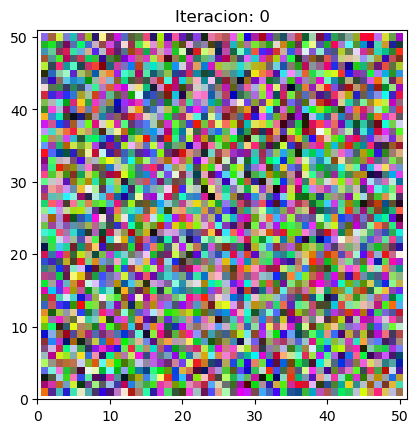

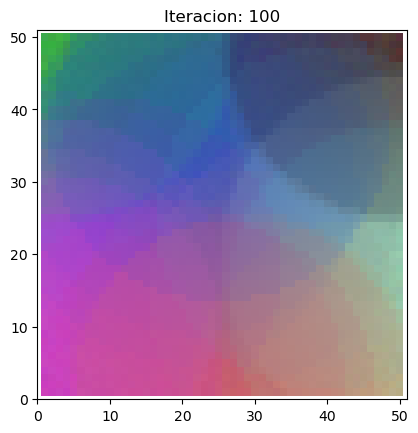

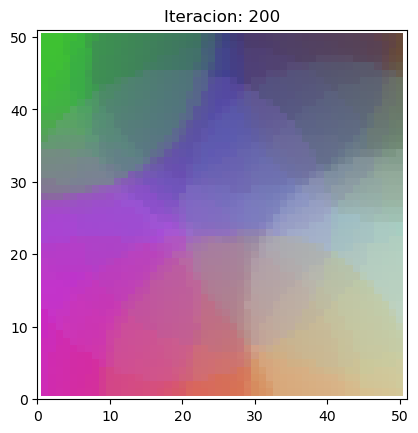

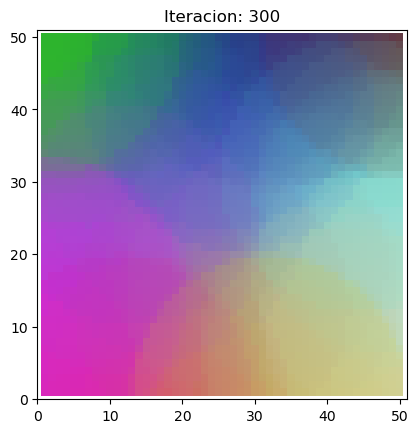

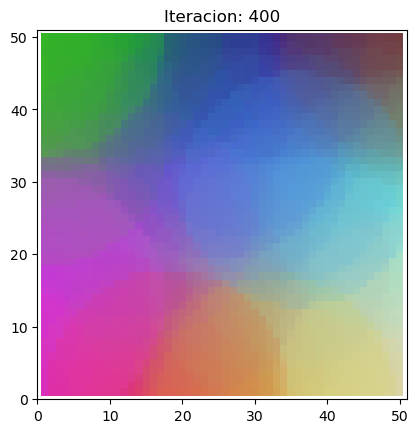

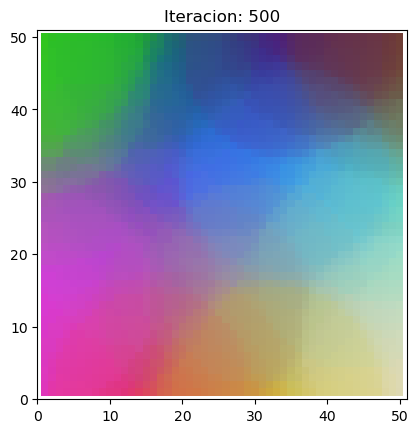

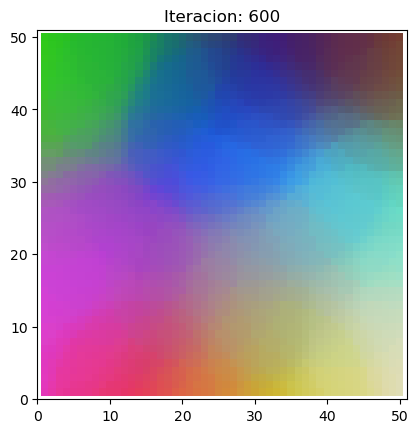

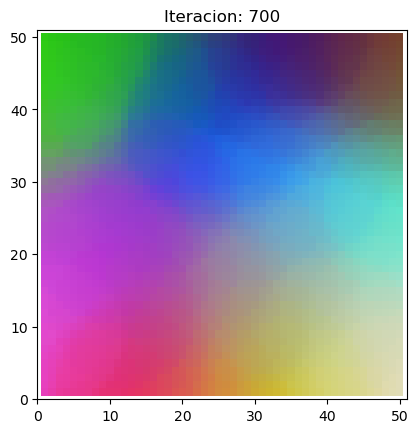

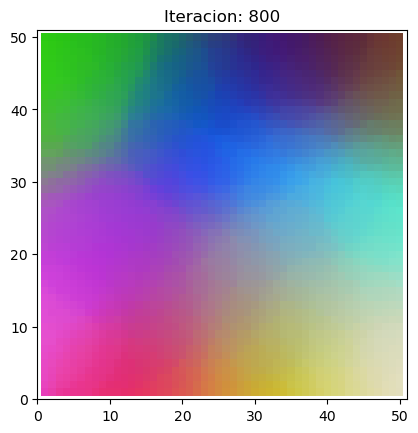

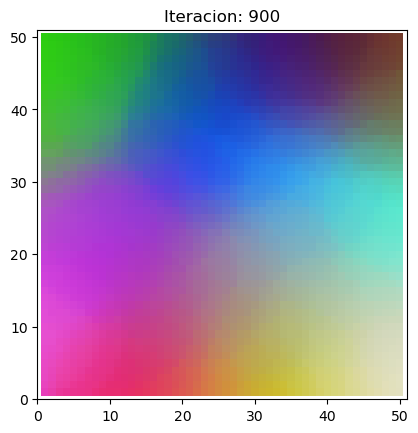

In [257]:
pintar_mapa(matriz_pesos, "Iteracion: 0")
# Entrena la red con el dataset de entrenamiento
for i in range(periodo):
    #Escogemos un patron (R, G, B) de entre los 100 colores disponibles de forma random
    patron_elegido = datos[:, np.random.randint(0, num_datos)]
    #Buscamos y encontramos la BMU y su posicion en la capa de cojones
    neurona_bmu, bmu_indice = calcular_bmu(patron_elegido, matriz_pesos, num_entradas)
    learning_rate_actual = variacion_learning_rate(learning_rate, i, periodo)
    vecindario_actual = variacion_vecindario(vecindario, i, periodo)
    
    for fila in range(lado_mapa):
        for columna in range(lado_mapa):
            distancia_bmu = np.sqrt((fila - bmu_indice[0])**2 + (columna - bmu_indice[1])**2)
            if distancia_bmu <=vecindario_actual:
                amortiguacion = decay(distancia_bmu, vecindario_actual)
                matriz_pesos[fila, columna] += learning_rate_actual * amortiguacion * (patron_elegido - matriz_pesos[fila, columna])
    if i % 100 == 0 and i != 0:
        pintar_mapa(matriz_pesos, f"Iteracion: {i}")


## SOM Clasificación

In [258]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada



## SOM Prueba

In [259]:
# Clasifica nuevos patrones

